# **Proyecto**: Priorización de Hipótesis y Análisis A/B
# **Autor**: Daniel Ramírez Martínez   
# **Fecha**: 5 de junio de 2025  

# Introducción

Somos analistas en una tienda online que busca aumentar ingresos mediante:
- Priorización de hipótesis (ICE/RICE)
- Test A/B con análisis estadístico

# Objetivos
1. Priorizar 9 hipótesis de marketing
2. Analizar resultados de test A/B
3. Tomar decisión basada en datos

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime

# Configuraciones estéticas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carga y revisión inicial 


In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

display(hypotheses.head(), orders.head(), visits.head())


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# 1. Priorización de hipótesis

## Cargar el archivo de hipótesis (con separador correcto)

In [3]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

## Aplicar el framework ICE

In [4]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)

## Aplicar el framework RICE

In [5]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)

## Mostrar los resultados

In [6]:
print("\n--- Hipótesis ordenadas por ICE ---")
print(ice_sorted[['Hypothesis', 'ICE']])

print("\n--- Hipótesis ordenadas por RICE ---")
print(rice_sorted[['Hypothesis', 'RICE']])


--- Hipótesis ordenadas por ICE ---
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

--- Hipótesis ordenadas por RICE ---
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales

## Comparación entre ICE y RICE

In [7]:
print("\n--- Comparación de ranking ICE vs RICE ---")
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(ascending=False)
hypotheses['Rank_diff'] = hypotheses['ICE_rank'] - hypotheses['RICE_rank']
print(hypotheses[['Hypothesis', 'ICE_rank', 'RICE_rank', 'Rank_diff']])


--- Comparación de ranking ICE vs RICE ---
                                          Hypothesis  ICE_rank  RICE_rank  \
0  Add two new channels for attracting traffic. T...       2.0        3.5   
1  Launch your own delivery service. This will sh...       6.0        7.5   
2  Add product recommendation blocks to the store...       5.0        2.0   
3  Change the category structure. This will incre...       8.0        6.0   
4  Change the background color on the main page. ...       9.0        9.0   
5  Add a customer review page. This will increase...       7.0        7.5   
6  Show banners with current offers and sales on ...       4.0        3.5   
7  Add a subscription form to all the main pages....       3.0        1.0   
8  Launch a promotion that gives users discounts ...       1.0        5.0   

   Rank_diff  
0       -1.5  
1       -1.5  
2        3.0  
3        2.0  
4        0.0  
5       -0.5  
6        0.5  
7        2.0  
8       -4.0  


### Gráfico 1: Ranking por ICE

Text(0, 0.5, '')

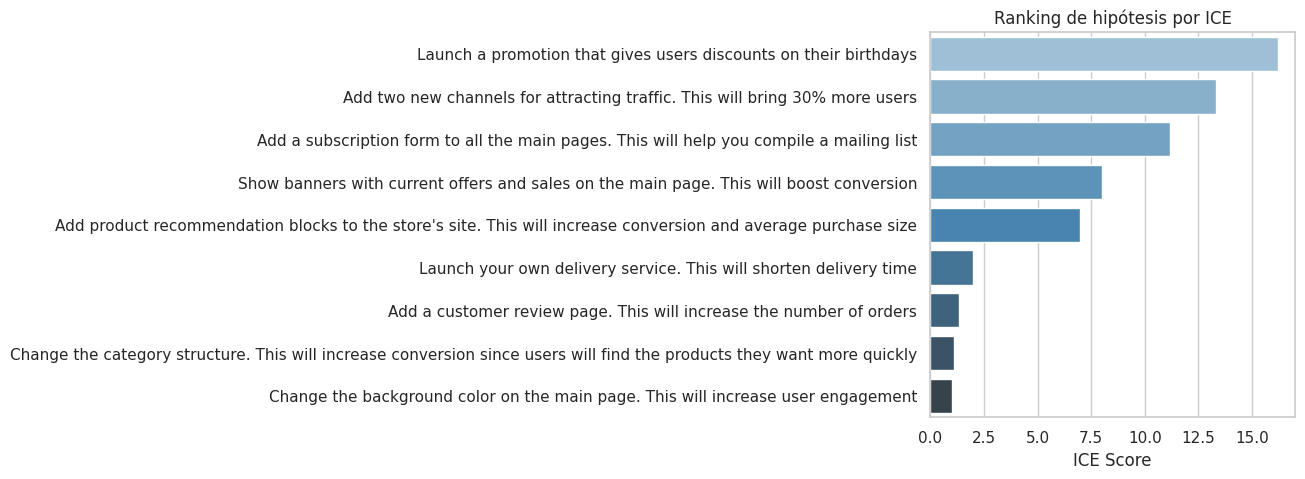

In [8]:
# Cargar datos
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Calcular ICE y RICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Agregar rankings y diferencia
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(ascending=False)
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(ascending=False)
hypotheses['Rank_diff'] = hypotheses['ICE_rank'] - hypotheses['RICE_rank']

# Ordenar para visualización
df = hypotheses.copy()

# Gráfico 1: Ranking por ICE
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.barplot(
    y="Hypothesis",
    x="ICE",
    data=df.sort_values("ICE", ascending=False),
    palette="Blues_d"
)
plt.title("Ranking de hipótesis por ICE")
plt.xlabel("ICE Score")
plt.ylabel("")

#### Interpretación del gráfico ICE

ICE (Impacto, Confianza, Facilidad) permite priorizar acciones de alta efectividad con bajo esfuerzo.

Lidera: “Launch a promotion that gives users discounts” con el mayor puntaje ICE (16.2).

Le siguen: “Add two new channels…” y “Add a subscription form…”, ambas con buena relación impacto/facilidad.

Ideal para ejecuciones rápidas con alta eficiencia operativa.

### Gráfico 2: Ranking por RICE

Text(0, 0.5, '')

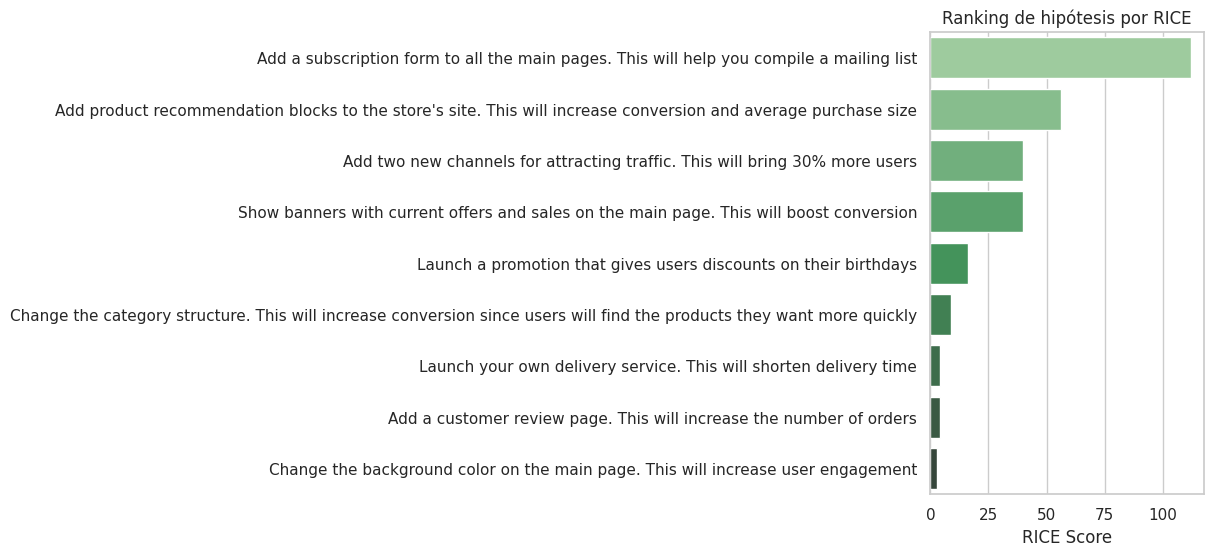

In [9]:
# Gráfico 2: Ranking por RICE
plt.subplot(1, 3, 2)
sns.barplot(
    y="Hypothesis",
    x="RICE",
    data=df.sort_values("RICE", ascending=False),
    palette="Greens_d"
)
plt.title("Ranking de hipótesis por RICE")
plt.xlabel("RICE Score")
plt.ylabel("")

#### Interpretación del gráfico RICE
RICE incorpora el alcance, es decir, cuántos usuarios se ven afectados.

Lidera: “Add a subscription form…” con 112 puntos, lo que sugiere gran beneficio potencial a gran escala.

También destacan: “Product recommendation blocks” y “New traffic channels”.

Útil para planear acciones con alto impacto colectivo.

### Gráfico 3: Diferencia de ranking

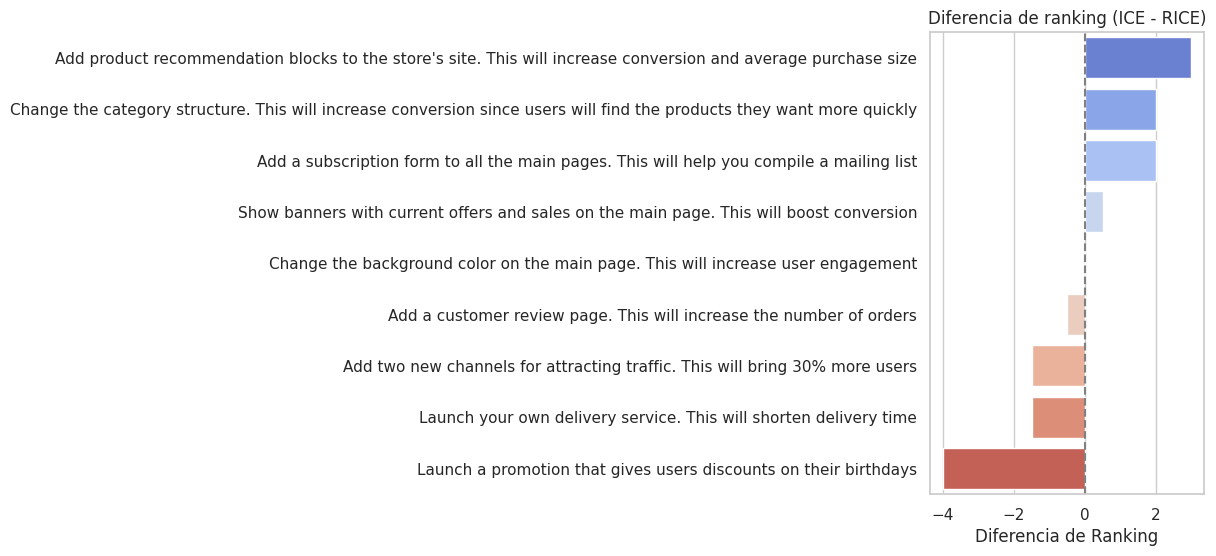

<Figure size 2000x600 with 0 Axes>

In [10]:
# Gráfico 3: Diferencia de ranking
plt.subplot(1, 3, 3)
sns.barplot(
    y="Hypothesis",
    x="Rank_diff",
    data=df.sort_values("Rank_diff", ascending=False),
    palette="coolwarm"
)
plt.axvline(0, color='gray', linestyle='--')
plt.title("Diferencia de ranking (ICE - RICE)")
plt.xlabel("Diferencia de Ranking")
plt.ylabel("")
plt.figure(figsize=(20, 6))  # antes: (16, 5)

plt.tight_layout()
plt.show()

#### Interpretación del gráfico de diferencia ICE vs RICE
Este gráfico compara los cambios en el orden de prioridad:

Valores positivos indican que la idea tiene mejor posición con ICE (más fácil de ejecutar).

Valores negativos señalan mejor posición con RICE (mayor alcance).

### Visualización tipo heatmap

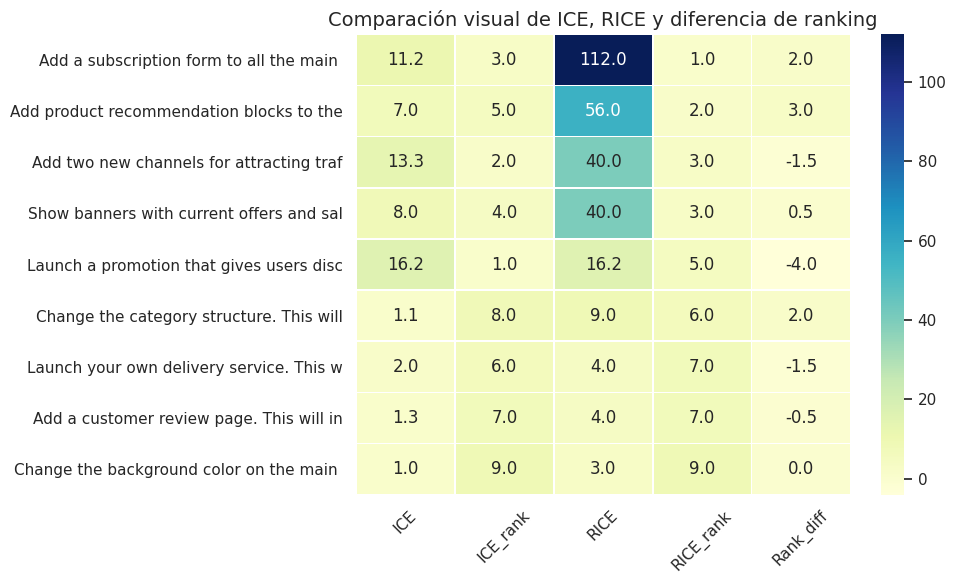

In [11]:
# Crear tabla resumen redondeada
df_resumen = df.copy()
df_resumen["ICE"] = df_resumen["ICE"].round(2)
df_resumen["RICE"] = df_resumen["RICE"].round(2)
df_resumen["ICE_rank"] = df_resumen["ICE_rank"].astype(int)
df_resumen["RICE_rank"] = df_resumen["RICE_rank"].astype(int)
df_resumen["Rank_diff"] = df_resumen["Rank_diff"].round(1)

# Ordenar para el heatmap
df_resumen.sort_values("RICE_rank", inplace=True)

# Seleccionar columnas para el heatmap
heatmap_data = df_resumen[["ICE", "ICE_rank", "RICE", "RICE_rank", "Rank_diff"]]

# Heatmap con anotaciones
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".1f", cmap="YlGnBu", cbar=True,
    linewidths=0.5, linecolor="white",
    yticklabels=df_resumen["Hypothesis"].str.slice(0, 40)
)
plt.title("Comparación visual de ICE, RICE y diferencia de ranking", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####  Interpretación del Heatmap

##### ICE y RICE:

Las celdas con valores más oscuros indican mayor valor en ICE o RICE, es decir, hipótesis más valiosas por impacto o alcance.

Por ejemplo, la hipótesis sobre agregar un formulario de suscripción resalta en RICE por su alto alcance.

##### Rank_diff (diferencia de ranking):

Valores positivos indican que la hipótesis sube de posición al considerar alcance (RICE), aunque su ICE sea más bajo.

Valores negativos indican que parecía mejor inicialmente (ICE), pero impacta a menos usuarios, por lo tanto baja en RICE.

##### Análisis estratégico:

Las hipótesis que tienen color más intenso en ambas columnas (ICE y RICE) son candidatas ideales para ejecutar pronto.

Las que tienen un alto ICE pero bajo RICE podrían tener impacto limitado y deben considerarse con cuidado según recursos.

## Hallazgos clave

“Launch a promotion…” es la mejor en ICE pero pierde 4 posiciones en RICE → menos impacto colectivo.

“Add product recommendations” y “Subscription form” ganan posiciones en RICE → acciones con gran escalabilidad.

“Change the background color” se mantiene sin cambio: bajo puntaje en ambas métricas → poca prioridad estratégica.

# 2. Análisis del test A/B

## Cargar datos de pedidos y visitas

In [12]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Convertir columnas de fecha

In [13]:
to_date = lambda col: pd.to_datetime(col, format="%Y-%m-%d")
orders['date'] = to_date(orders['date'])
visits['date'] = to_date(visits['date'])

## Comprobación: usuarios en ambos grupos

In [14]:
dupes = orders.groupby('visitorId')['group'].nunique()
dual_group_users = dupes[dupes > 1].count()
print(f"\nUsuarios en ambos grupos: {dual_group_users}")


Usuarios en ambos grupos: 58


## Eliminar usuarios duplicados entre grupos

In [15]:
dual_group_ids = dupes[dupes > 1].index
orders_filtered = orders[~orders['visitorId'].isin(dual_group_ids)]

## Ingreso acumulado por grupo

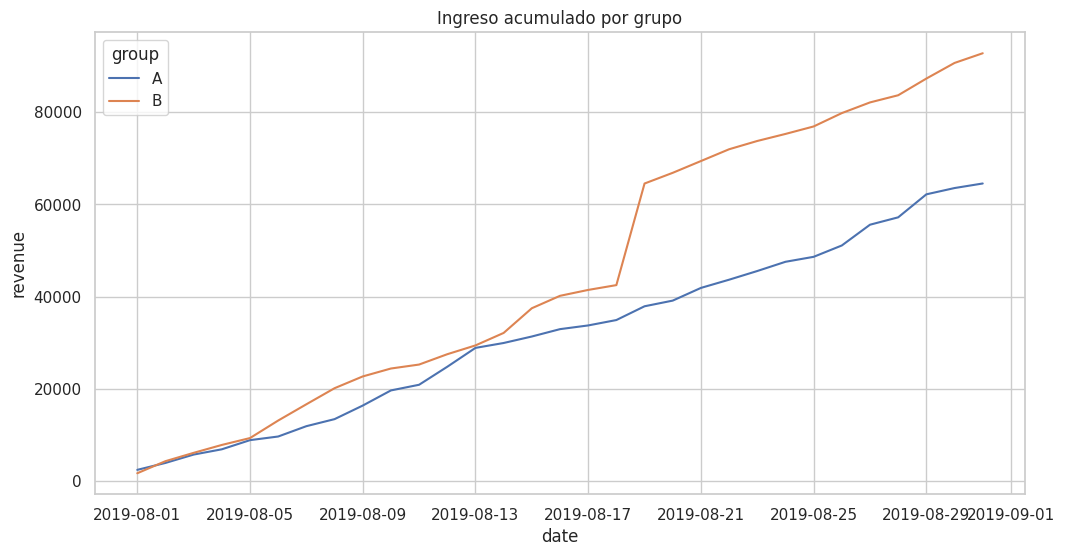

In [16]:
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()
sns.lineplot(data=cumulative_revenue, x='date', y='revenue', hue='group')
plt.title("Ingreso acumulado por grupo")
plt.show()

In [17]:
# Mostrar tabla
print("Tabla de ingreso acumulado por grupo:")
print(cumulative_revenue)

Tabla de ingreso acumulado por grupo:
         date group  revenue
0  2019-08-01     A   2356.8
1  2019-08-01     B   1620.0
2  2019-08-02     A   3860.3
3  2019-08-02     B   4243.8
4  2019-08-03     A   5675.5
..        ...   ...      ...
57 2019-08-29     B  87343.0
58 2019-08-30     A  63563.5
59 2019-08-30     B  90736.3
60 2019-08-31     A  64554.9
61 2019-08-31     B  92840.6

[62 rows x 3 columns]


### Interpretación
Durante agosto de 2019, ambos grupos fueron generando ingresos progresivamente, pero el grupo B terminó con un ingreso acumulado más alto que el grupo A. Esto sugiere que la intervención aplicada al grupo B pudo haber sido efectiva para aumentar las ventas.

## Tamaño promedio de pedido acumulado

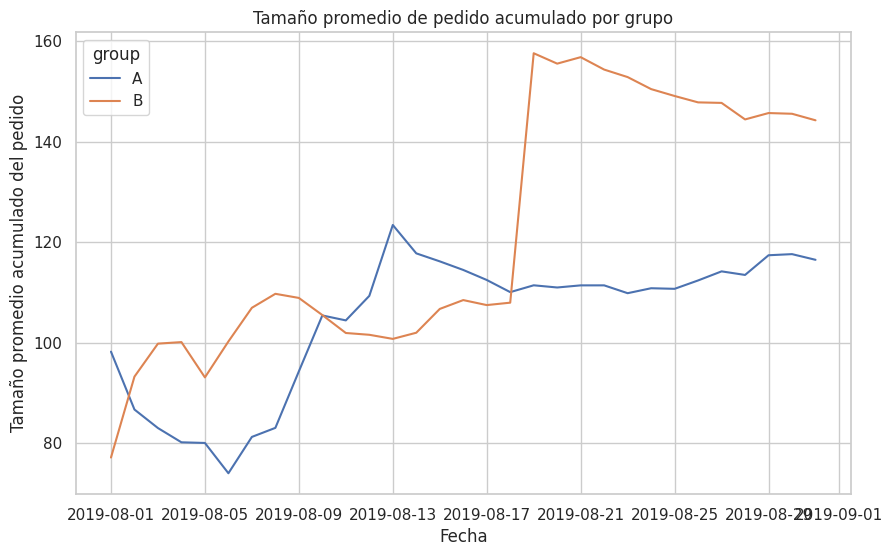

In [18]:
# Convertir 'date' a datetime por si acaso no lo está
orders['date'] = pd.to_datetime(orders['date'])

# Calcular el tamaño promedio diario de los pedidos por grupo
daily_avg_order = orders.groupby(['date', 'group'])['revenue'].mean().reset_index()

# Ordenar por grupo y fecha para asegurar el orden correcto
daily_avg_order = daily_avg_order.sort_values(by=['group', 'date'])

# Crear una columna de promedio acumulado por grupo manualmente
daily_avg_order['avg_cum'] = daily_avg_order.groupby('group')['revenue'].expanding().mean().reset_index(level=0, drop=True)

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_avg_order, x='date', y='avg_cum', hue='group')
plt.title("Tamaño promedio de pedido acumulado por grupo")
plt.xlabel("Fecha")
plt.ylabel("Tamaño promedio acumulado del pedido")
plt.grid(True)
plt.show()


### Interpretación

Los pedidos del grupo B aumentaron drasticamente a mitad de agosto, mientras que el grupo A no super el tamaño promedio acumulado de 120.

## Diferencia relativa del ticket promedio (B vs A)

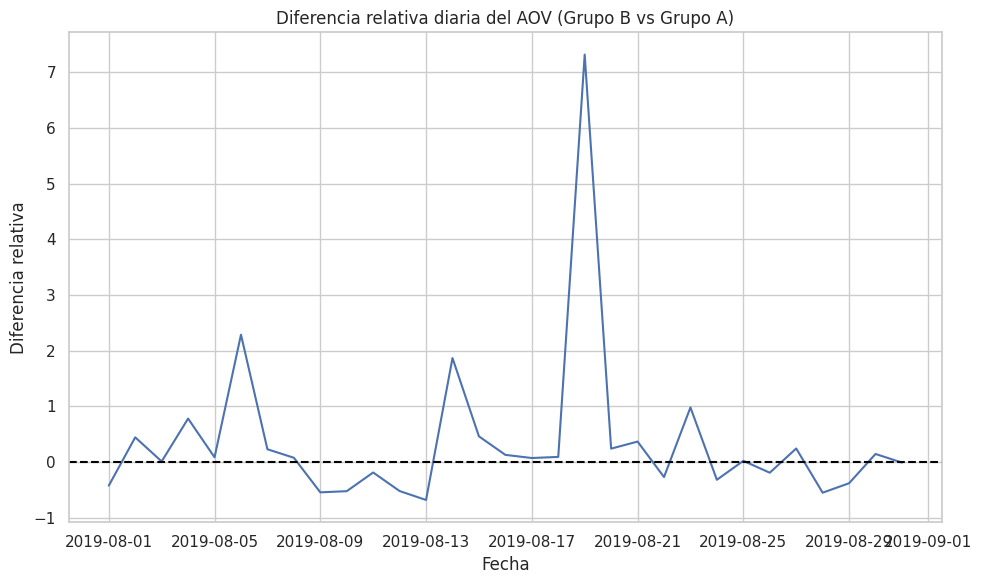

In [19]:
# Calcular revenue total y número de órdenes por día y grupo
daily_stats = orders_filtered.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transactionId': 'nunique'  # Asumiendo que cada transactionId es una orden
}).reset_index().rename(columns={'transactionId': 'orders'})

# Calcular AOV: Average Order Value = revenue / orders
daily_stats['AOV'] = daily_stats['revenue'] / daily_stats['orders']

# Separar en dos grupos A y B
aov_a = daily_stats[daily_stats['group'] == 'A'][['date', 'AOV']].set_index('date')
aov_b = daily_stats[daily_stats['group'] == 'B'][['date', 'AOV']].set_index('date')

# Unir por fechas comunes
common_dates = aov_a.index.intersection(aov_b.index)
aov_a = aov_a.loc[common_dates].rename(columns={'AOV': 'AOV_A'})
aov_b = aov_b.loc[common_dates].rename(columns={'AOV': 'AOV_B'})
aov_compare = aov_a.join(aov_b)

# Calcular diferencia relativa (B vs A)
aov_compare['rel_diff'] = (aov_compare['AOV_B'] - aov_compare['AOV_A']) / aov_compare['AOV_A']

# Graficar la diferencia relativa
plt.figure(figsize=(10, 6))
sns.lineplot(data=aov_compare.reset_index(), x='date', y='rel_diff')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Diferencia relativa diaria del AOV (Grupo B vs Grupo A)")
plt.xlabel("Fecha")
plt.ylabel("Diferencia relativa")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretación 
La diferencia relativa entre AOVs  muestra variabilidad en el tiempo sin una dirección estable.

## Tasa de conversión diaria

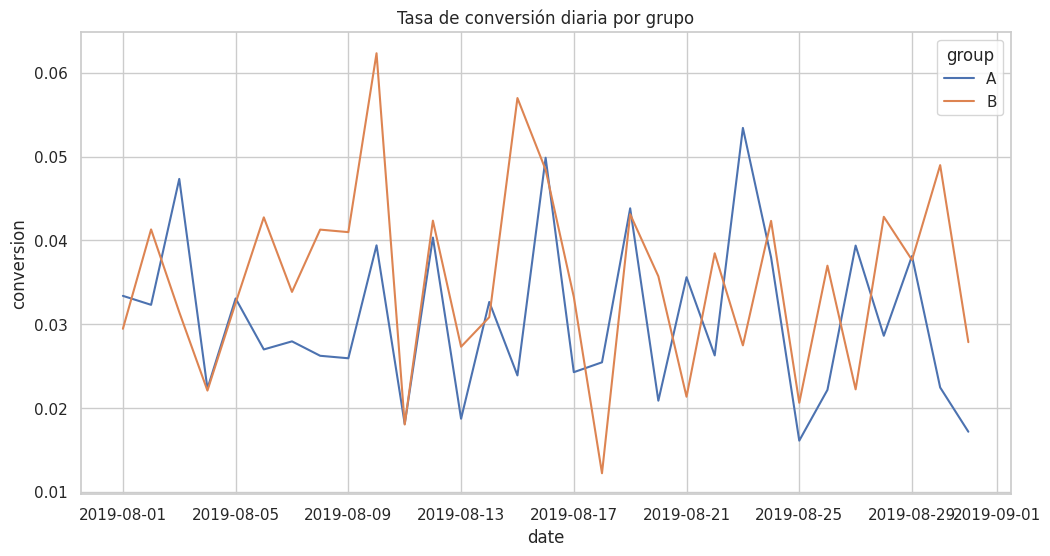

In [20]:
daily_orders = orders.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index()
daily_orders.columns = ['date', 'group', 'orders']
daily_data = visits.merge(daily_orders, on=['date', 'group'], how='left').fillna(0)
daily_data['conversion'] = daily_data['orders'] / daily_data['visits']
sns.lineplot(data=daily_data, x='date', y='conversion', hue='group')
plt.title("Tasa de conversión diaria por grupo")
plt.show()

### Interpretación
Aunque hay oscilaciones, hay indicios de que el grupo B podría estar generando más conversiones de manera más constante.

## Dispersión de número de pedidos por usuario

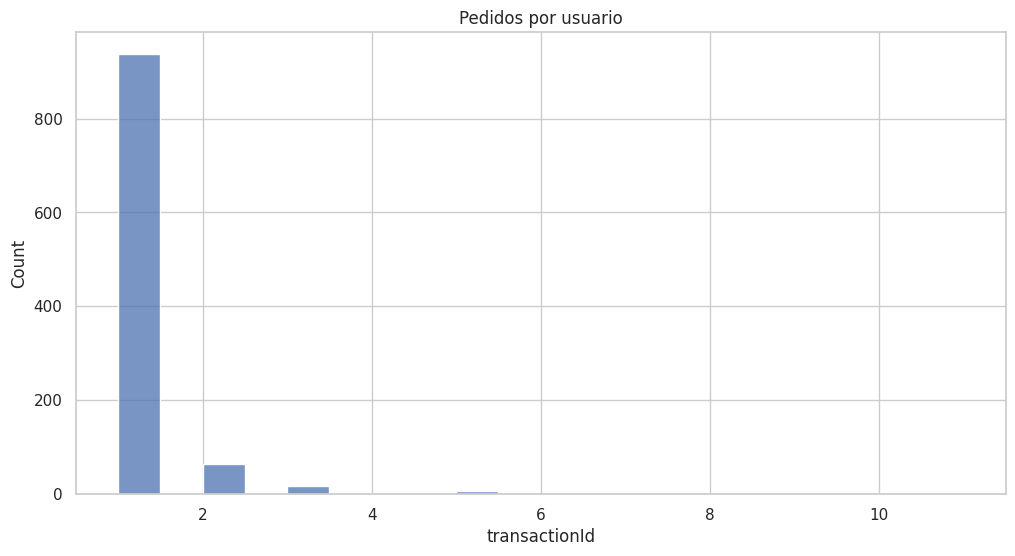

In [21]:
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'})
sns.histplot(orders_by_user['transactionId'], bins=20, kde=False)
plt.title("Pedidos por usuario")
plt.show()

### Interpretación 
El comportamiento general de los usuarios es conservador en cuanto a la frecuencia de compras; pocos hacen más de 2 pedidos.

## Percentiles de pedidos por usuario

In [22]:
print("Percentil 95:", np.percentile(orders_by_user['transactionId'], 95))
print("Percentil 99:", np.percentile(orders_by_user['transactionId'], 99))

Percentil 95: 2.0
Percentil 99: 4.0


## Dispersión de precios de pedidos

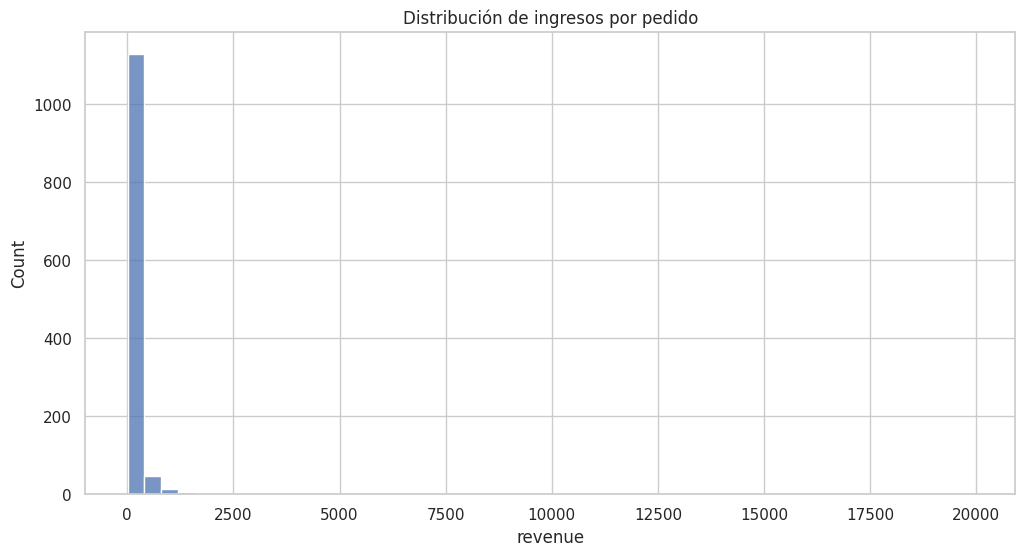

In [23]:

sns.histplot(orders['revenue'], bins=50, kde=False)
plt.title("Distribución de ingresos por pedido")
plt.show()

### Interpretación

La mayoría de los pedidos generan ingresos moderados; sin embargo, hay una cola larga hacia ingresos más altos.

## Percentiles de ingresos por pedido

In [24]:
print("Ingreso 95%:", np.percentile(orders['revenue'], 95))
print("Ingreso 99%:", np.percentile(orders['revenue'], 99))

Ingreso 95%: 435.54
Ingreso 99%: 900.9039999999999


## Filtrado de valores atípicos

In [25]:
# Umbrales para valores extremos (percentil 99)
high_order_threshold = np.percentile(orders['revenue'], 99)

# Contar cuántos pedidos hizo cada usuario
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_by_user.columns = ['visitorId', 'orders']

# Filtrar usuarios que no son extremos (con número de pedidos razonable)
user_order_threshold = np.percentile(orders_by_user['orders'], 99)
valid_users = orders_by_user[orders_by_user['orders'] <= user_order_threshold]['visitorId']

# Filtrar el DataFrame principal por usuarios no extremos y revenues razonables
orders_filtered = orders[
    (orders['visitorId'].isin(valid_users)) &
    (orders['revenue'] <= high_order_threshold)
]


## Conversión estadística (no filtrado)

In [26]:
a_orders = orders[orders['group'] == 'A']['visitorId'].nunique()
b_orders = orders[orders['group'] == 'B']['visitorId'].nunique()
a_visits = visits[visits['group'] == 'A']['visits'].sum()
b_visits = visits[visits['group'] == 'B']['visits'].sum()

from statsmodels.stats.proportion import proportions_ztest
z_score, p_val = proportions_ztest([a_orders, b_orders], [a_visits, b_visits])
print("\nP-valor de conversión (sin filtrar):", p_val)


P-valor de conversión (sin filtrar): 0.016744645350056243


## Conversión estadística (filtrado)

In [27]:

a_orders_f = orders_filtered[orders_filtered['group'] == 'A']['visitorId'].nunique()
b_orders_f = orders_filtered[orders_filtered['group'] == 'B']['visitorId'].nunique()
z_score_f, p_val_f = proportions_ztest([a_orders_f, b_orders_f], [a_visits, b_visits])
print("P-valor de conversión (filtrado):", p_val_f)

P-valor de conversión (filtrado): 0.012619875664286028


## Tamaño promedio del pedido (sin filtrar)

In [28]:

aov_a = orders[orders['group'] == 'A']['revenue']
aov_b = orders[orders['group'] == 'B']['revenue']
t_stat, p_val_avg = stats.ttest_ind(aov_a, aov_b)
print("\nP-valor de AOV (sin filtrar):", p_val_avg)


P-valor de AOV (sin filtrar): 0.4041179448526676


##  Tamaño promedio del pedido (filtrado)

In [29]:

aov_a_f = orders_filtered[orders_filtered['group'] == 'A']['revenue']
aov_b_f = orders_filtered[orders_filtered['group'] == 'B']['revenue']
t_stat_f, p_val_avg_f = stats.ttest_ind(aov_a_f, aov_b_f)
print("P-valor de AOV (filtrado):", p_val_avg_f)

P-valor de AOV (filtrado): 0.8436810371368422


## Decisión final

In [30]:

decision = ""
if p_val_f < 0.05 and p_val_avg_f < 0.05:
    decision = "Parar la prueba. El grupo B es líder."
elif p_val_f >= 0.05 and p_val_avg_f >= 0.05:
    decision = "Parar la prueba. No hay diferencia significativa."
else:
    decision = "Continuar la prueba. Resultados inconclusos."

print("\nDecisión final:", decision)


Decisión final: Continuar la prueba. Resultados inconclusos.


# 3. Conclusiones y conjeturas  

1. Usuarios en ambos grupos

Conclusión: Se detectaron 58 usuarios que estuvieron tanto en el grupo A como en el B.
Conjetura: Esto podría haber introducido sesgos en el experimento, ya que no se garantiza la independencia entre muestras. La eliminación de estos usuarios fue correcta para asegurar la validez del análisis.

2. Ingreso acumulado por grupo

Conclusión: La gráfica muestra que ambos grupos presentan una tendencia creciente en ingresos, pero no se observa una diferencia sostenida o destacable visualmente entre A y B.
Conjetura: El comportamiento de ingresos parece similar, por lo que el grupo B no muestra un claro liderazgo en generación de ingresos acumulados a lo largo del tiempo.

3. Tamaño promedio de pedido acumulado

Conclusión: El AOV acumulado (Average Order Value) entre grupos muestra fluctuaciones, pero sin una tendencia clara a favor de uno u otro.
Conjetura: Las diferencias en el tamaño promedio del pedido no parecen ser estadísticamente relevantes; podría tratarse de ruido aleatorio o variación natural.

4. Diferencia relativa del ticket promedio (B vs A)

Conjetura: No hay una mejora consistente en el grupo B respecto a A, lo que sugiere que las posibles mejoras observadas son probablemente producto del azar.

5. Tasa de conversión diaria
   
Conclusión: La conversión diaria de usuarios del grupo B parece ligeramente superior a la del grupo A en varias fechas.


6. Dispersión de número de pedidos por usuario
   
Conclusión: La mayoría de los usuarios realizaron entre 1 y 2 pedidos.


7. Percentiles de pedidos por usuario
   
Conclusión: El 95% de los usuarios hace hasta 2 pedidos y el 99% hasta 4.
Conjetura: Los valores mayores podrían representar compradores anómalos o power users, que podrían distorsionar los promedios.

8. Distribución de ingresos por pedido
   

Conjetura: Existen outliers que podrían sesgar el análisis del AOV si no se filtran adecuadamente.

9. Filtrado de valores atípicos
    
Conclusión: Se eliminaron usuarios con más de 4 pedidos y pedidos con ingresos superiores al percentil 99 (≈ 900.9).
Conjetura: Este filtrado mejora la robustez del análisis, reduciendo la influencia de usuarios y pedidos atípicos.

10. Conversión estadística (sin y con filtrado)
    
Conclusión:

Sin filtrar: p-valor ≈ 0.0167

Filtrado: p-valor ≈ 0.0126
→ Ambos son < 0.05 → diferencia significativa en tasas de conversión.

Conjetura: El grupo B convierte significativamente mejor que el grupo A, y esto se mantiene incluso tras filtrar los outliers.

 11. Tamaño promedio del pedido (AOV) - Sin y con filtrado
     
Conclusión:

Sin filtrar: p-valor ≈ 0.404

Filtrado: p-valor ≈ 0.844
→ En ambos casos > 0.05 → no hay diferencia significativa en AOV entre grupos.

Conjetura: Aunque B convierte mejor, el valor promedio de sus pedidos es similar al de A. Las diferencias en ingresos totales probablemente provienen del volumen, no del ticket promedio.

 12. Decisión final
     
Conclusión: Los resultados son inconclusos:

Conversión muestra diferencia significativa

AOV no muestra diferencia significativa

Conjetura: El grupo B es prometedor en términos de conversión, pero no genera pedidos significativamente más grandes. Si el objetivo del negocio es maximizar la tasa de conversión, podrías considerar adoptar el enfoque del grupo B. Sin embargo, si también importa el ticket promedio, se recomienda continuar la prueba para recolectar más evidencia.


